In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file_path = 'PROCESSED_DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)
df.shape

(24778, 24)

In [3]:
# Assuming 'Class' is the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


KNN Model Accuracy: 0.9857411891310196

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1026
           1       1.00      1.00      1.00      1018
           2       0.95      0.97      0.96      1089
           3       1.00      1.00      1.00      1063
           4       1.00      1.00      1.00      1081
           5       1.00      1.00      1.00      1081
           6       0.98      0.99      0.98      1076

    accuracy                           0.99      7434
   macro avg       0.99      0.99      0.99      7434
weighted avg       0.99      0.99      0.99      7434



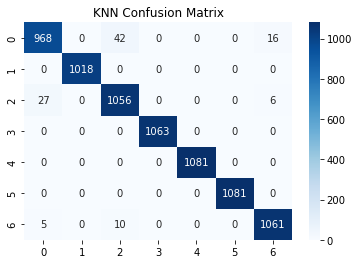

In [4]:
# Initialize KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("KNN Confusion Matrix")
plt.show()


Random Forest Model Accuracy: 0.9891041162227603

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1026
           1       1.00      1.00      1.00      1018
           2       0.96      0.98      0.97      1089
           3       1.00      1.00      1.00      1063
           4       1.00      1.00      1.00      1081
           5       1.00      1.00      1.00      1081
           6       0.98      0.99      0.99      1076

    accuracy                           0.99      7434
   macro avg       0.99      0.99      0.99      7434
weighted avg       0.99      0.99      0.99      7434



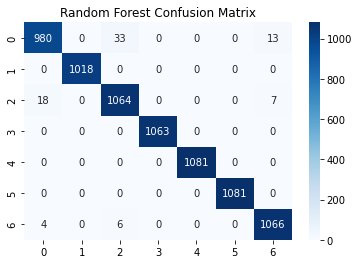

In [5]:
# Initialize Random Forest model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [6]:
# Assuming the problem is regression (if it were classification, use Logistic Regression)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)  # Not applicable for classification

# Evaluate model
# For regression, use appropriate metrics such as Mean Squared Error (MSE)


In [7]:
# K-Fold Cross Validation for KNN
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("Mean KNN Cross-Validation Score:", np.mean(cv_scores_knn))

# K-Fold Cross Validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean Random Forest Cross-Validation Score:", np.mean(cv_scores_rf))


KNN Cross-Validation Scores: [0.98731988 0.98270893 0.98674352 0.99020173 0.98673587 0.98385236
 0.98904268 0.98558247 0.98096886 0.99077278]
Mean KNN Cross-Validation Score: 0.9863929080701614
Random Forest Cross-Validation Scores: [0.98443804 0.98674352 0.98847262 0.99135447 0.99250288 0.99019608
 0.99480969 0.99077278 0.98558247 0.99250288]
Mean Random Forest Cross-Validation Score: 0.9897375427540063


In [8]:
# Train and test accuracy for KNN
train_accuracy_knn = accuracy_score(y_train, knn.predict(X_train))
print("KNN Training Accuracy:", train_accuracy_knn)

# Train and test accuracy for Random Forest
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))
print("Random Forest Training Accuracy:", train_accuracy_rf)


KNN Training Accuracy: 0.9916974169741697
Random Forest Training Accuracy: 1.0
